In [68]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

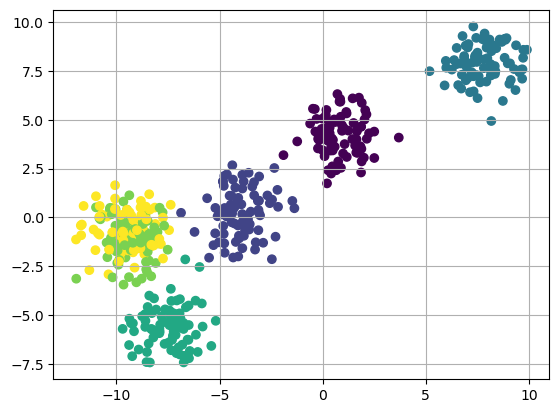

In [92]:
x,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)
plt.figure(0)
plt.grid("on")
plt.scatter(x[:,0],x[:,1],c=y)

### 

In [93]:
k=5
color=["green","red","blue","yellow","orange"]
clusters={}

for i in range(k):
    center=10*(2*np.random.random((x.shape[1],))-1)
    points=[]
    cluster={
        'center':center,
         'points':points,
        'color':color[i]
    
     }
    clusters[i]=cluster



In [94]:
clusters
###algorithm

{0: {'center': array([ 6.33149559, -2.65971431]),
  'points': [],
  'color': 'green'},
 1: {'center': array([6.24943042, 2.87731396]), 'points': [], 'color': 'red'},
 2: {'center': array([3.71502307, 2.84111818]), 'points': [], 'color': 'blue'},
 3: {'center': array([-7.4109156 , -9.37105755]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([ 7.45588894, -1.70988023]),
  'points': [],
  'color': 'orange'}}

In [95]:
def distance(v1,v2):
    return np.sqrt(np.sum(v1-v2)**2)

In [73]:
#step2

In [96]:
def assign(clusters):
    for i in range(x.shape[0]):
        dist=[] 
        curr_x=x[i]
        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        current_cluster=np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)

In [105]:
#step3
def update(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:#if non zero pint
            new_u=pts.mean(axis=0)
            clusters[kx]['center']=new_u
            clusters[kx]['points']=[]

def plotCluster(clusters):
    for kx in range(k):
        print(len(clusters[kx]['points']))
        pts=np.array(clusters[kx]['points'])
        print(pts)
        try:
            plt.scalar(pts[:,0],pts[:,1])
    
        except:
             pass
        uk=clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")

0
[]
0
[]
0
[]
0
[]
0
[]


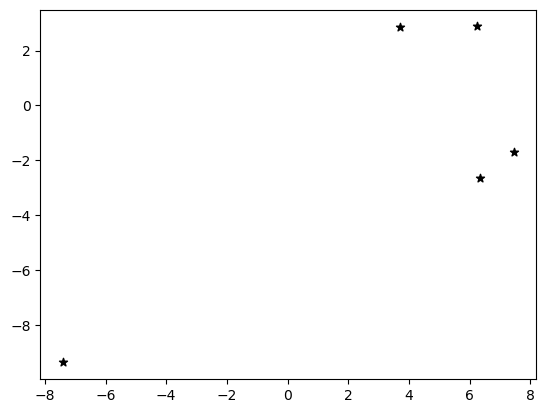

In [106]:
plotCluster(clusters)

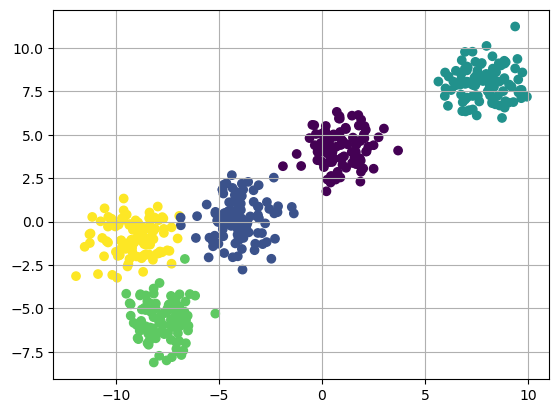

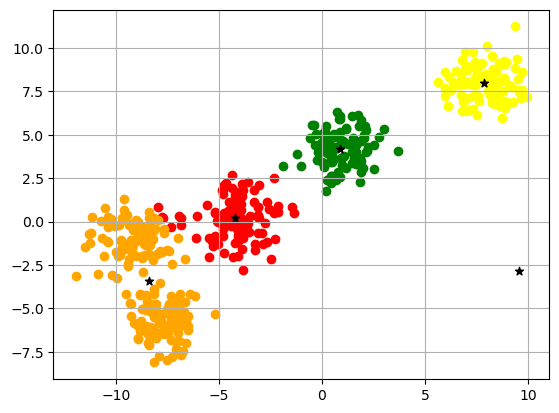

In [108]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
x, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)
plt.figure(0)
plt.grid("on")
plt.scatter(x[:,0], x[:,1], c=y)

# Initialize parameters
k = 5
colors = ["green", "red", "blue", "yellow", "orange"]
clusters = {}

for i in range(k):
    center = 10 * (2 * np.random.random((x.shape[1],)) - 1)
    clusters[i] = {
        'center': center,
        'points': [],
        'color': colors[i]
    }

# Distance function
def distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

# Assign points to the nearest cluster center
def assign(clusters):
    for i in range(x.shape[0]):
        curr_x = x[i]
        dists = [distance(curr_x, clusters[kx]['center']) for kx in range(k)]
        current_cluster = np.argmin(dists)
        clusters[current_cluster]['points'].append(curr_x)

# Update cluster centers based on assigned points
def update(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        if pts.shape[0] > 0:  # if there are points assigned to the cluster
            new_center = pts.mean(axis=0)
            clusters[kx]['center'] = new_center
        clusters[kx]['points'] = []  # clear points for reassignment

# Plot clusters
def plotCluster(clusters):
    plt.figure(1)
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        if pts.shape[0] > 0:
            plt.scatter(pts[:, 0], pts[:, 1], color=clusters[kx]['color'])
        uk = clusters[kx]['center']
        plt.scatter(uk[0], uk[1], color="black", marker="*")
    plt.grid("on")
    plt.show()

# Main k-means loop
for i in range(10):  # Perform 10 iterations
    assign(clusters)
    update(clusters)

# Final assignment for plotting
assign(clusters)
plotCluster(clusters)
